# CMSE 802 In-class assignment: Matrix Solvers
## Date: 09/18/2018
## The goal of this assignment is to practice what we have learned about solving differential equations so far. We will use a 2D Possion's equation for the development of this assignment.

---
### Your name: Boyao Zhu


---
### Background: Poisson's equation
Poisson's equation is a partital differential equation broadly used in physics. It is typically written as

$$\nabla^2 \phi = f .$$ 

It is very similar to the Laplace equation, except for the non-zero sorce term appearing on the right hand side of the equation. According to Gauss's law, we have

$$ \nabla \cdot E = \frac{\rho}{\varepsilon},$$

where $E = -\nabla \phi$ is the electric field, $\rho$ is the free charge, $\varepsilon$ is the permittivity, and $\phi$ is the electric potential. Thus, we obtain

$$\nabla^2 \phi = -\frac{\rho}{\varepsilon}.$$

In this assginment, we will use the techniques we learned in the previous assignments to solve this equation.

### Problem set up

A 2D domain spans from $x=0$ to $x=2$ and from $y=0$ to $y=1$. The electric potential is fixed at $\phi = 2$ at $x=0$, and $\phi = 0$ at $x=2$. No-flux boundary conditions are imposed at $y=0$ and $y=1$. One positive free charge ($\rho/\varepsilon = 2000$) is located at $(x=0.52, y = 0.28)$. One negative free charge ($\rho/\varepsilon = -2000$) is located at $(x=1.52, y = 0.72)$. See the figure below.

<img src="PoisDm-1.png",width=500, height=500 />

**Let's solve the electric potential within this 2D domain.**

---
### Part 1: Use iterative matrix scheme to solve 2D Poisson's equation.
**For convenience, we will discretize the domain in equal grid spacings in the x and y directions. In the x direction, we use 101 grid points, and in the y direction we use 51 grid points, such that dx = dy = 0.02. Assuming $\varepsilon = 1$, thus $\rho/\varepsilon = \rho$. **

We will solve

$$\bigg( \frac{\partial^2 \phi}{\partial x^2} + \frac{\partial^2 \phi}{\partial y^2} \bigg)= -\rho.$$


<font color=red>**Task 1:**</font> **Type the stencil for the Poisson's equation above. Then, type the stencil for the iterative solver scehme. (Recall what we practice on the 1D Heat equation in the previous in-class assignment.)**

**Your answer:** $\bigg(\frac{\phi_{i-1,j}-2\phi_{i,j}+\phi_{i+1,j}}{\Delta x^2} + \frac{\phi_{i,j-1}-2\phi_{i,j}+\phi_{i,j+1}}{\Delta y^2}\bigg) = \rho_{i,j}$
// 
$\phi_{i,j}^{n+1} = \frac{\Delta x^2\rho + \phi_{i-1,j}^n+\phi_{i+1,j}^n+\phi_{i,j-1}^n+\phi_{i,j+1}^n}{4}$

<font color=red>**Task 2:**</font> **As in the previous assignments, we need to use norm of residual to verify how close the result is to the true solution. In this 2D case, at each gird, **

$$r = \bigg( \frac{\partial^2 \phi}{\partial x^2} + \frac{\partial^2 \phi}{\partial y^2} \bigg) + \rho.$$

**Clearly, if $r = 0$ at every grid point, the result is the true solution.  Type the stencil for calculating the residual at a grid point labeled by (i, j).**

**Your answer:** $\bigg(\frac{\phi_{i-1,j}-2\phi_{i,j}+\phi_{i+1,j}}{\Delta x^2} + \frac{\phi_{i,j-1}-2\phi_{i,j}+\phi_{i,j+1}}{\Delta y^2}\bigg) + \rho_{i,j} = r$

<font color=red>**Task 3:**</font> ** Fill the blank in the code and make it work. **

dx =  0.02 ; dy =  0.02
computer time =  10.95570993423462  s
number of iterations =  67157 ; norm =  9.998811260653724e-06


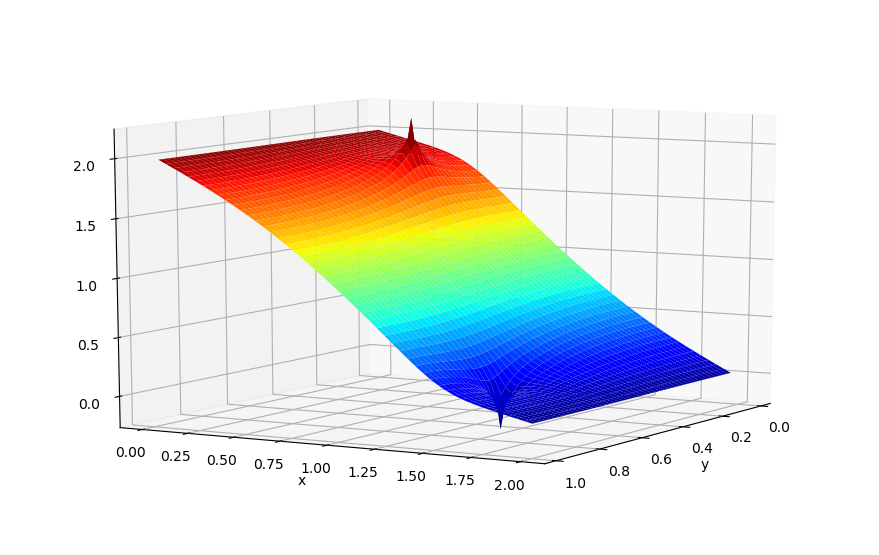

In [23]:
# load libraries
import numpy as np
import time as tm

import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D


# spatial discretization
nx = 101+0
Xg = np.linspace(0, 2, nx)

ny = 51+0
Yg = np.linspace(0, 1, ny)

# meshgrid generate the x and y coordinates of the 2D grid system
xmsh, ymsh = np.meshgrid(Yg, Xg)

dx = Xg[2] - Xg[1]
dy = Yg[2] - Yg[1]

print('dx = ', dx, '; dy = ', dy)

# potential field
phi = np.zeros((nx,ny))
rho = np.zeros((nx,ny))
rho[25+1,13+1] = 2000.
rho[75+1,35+1] = -2000.


# residual in a 2D discretization
resd = np.zeros((nx,ny))
nrm = []

# walltime before iterative matrix solving
WT_bgn = tm.time()

# iteration
for iter in range(100000):
    
    # iterative solver using vectorized calculation
    phi[1:nx-1,1:ny-1] = (dx**2*rho[1:nx-1,1:ny-1]+phi[0:nx-2,1:ny-1]+phi[2:nx,1:ny-1]+phi[1:nx-1,0:ny-2] + phi[1:nx-1,2:ny])/4             # <== fill the blank
    
    # boundary conditions at x = 0
    phi[0,1:ny-1] = 2       # <== fill the blank
    # boundary conditions at x = 2
    phi[nx-1,1:ny-1] = 0      # <== fill the blank
    # boundary conditions at y = 0
    phi[1:nx-1,0] = phi[1:nx-1,1]       # <== fill the blank
    # boundary conditions at y = 1
    phi[1:nx-1,ny-1] = phi[1:nx-1,ny-2]       # <== fill the blank
    
    # calculating residual using vectorized calculation
    resd[1:nx-1,1:ny-1] = (phi[0:nx-2,1:ny-1]-2*phi[1:nx-1,1:ny-1]+phi[2:nx,1:ny-1])/dx**2 + (phi[1:nx-1,0:ny-2]-2*phi[1:nx-1,1:ny-1]+phi[1:nx-1,2:ny])/dy**2 +rho[1:nx-1,1:ny-1]        # <== fill the blank
    
    # calculate Forbenius norm of the residual
    nrm.append(np.linalg.norm(resd[1:nx-1,1:ny-1]))
    
    # terminate the simulation
    if nrm[-1] < 1.0e-5:
        break

# walltime after iterative matrix solving        
WT_end = tm.time() 

print('computer time = ',WT_end - WT_bgn, ' s')

# visualization
fig = plt.figure(figsize=(11, 7), dpi=100)
ax = fig.gca(projection='3d')
ax.plot_surface(xmsh[1:nx-1,1:ny-1],ymsh[1:nx-1,1:ny-1], phi[1:nx-1,1:ny-1], cmap=cm.jet)
ax.view_init(10, 30)
# ax.set_zlim3d(0,1)
ax.set_xlabel('y')
ax.set_ylabel('x')

print('number of iterations = ',iter, '; norm = ', nrm[-1])
# plt.plot(nrm,'-')

plt.show()
# print(nrm)

<font color=red>**Task 4:**</font> **Here, I wrote a code for visualing this streamlines of the electric field. If you are doing the matrix solver correctly in the previous cell, this visualization code should be able to plot the streamlines.**

/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


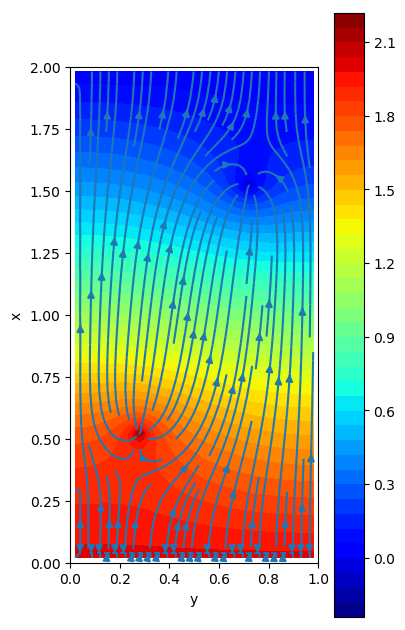

In [12]:
import numpy as np
import matplotlib.pyplot as plt

gPx = np.zeros((nx,ny))
gPy = np.zeros((nx,ny))

gPx[1:nx-1,1:ny-1] = -(phi[2:nx,1:ny-1] - phi[0:nx-2,1:ny-1])/(2*dx)
gPy[1:nx-1,1:ny-1] = -(phi[1:nx-1,2:ny] - phi[1:nx-1,0:ny-2])/(2*dx)


fig = plt.figure(figsize=(4, 8), dpi=100)

plt.contourf(xmsh[1:nx-1,1:ny-1], ymsh[1:nx-1,1:ny-1], phi[1:nx-1,1:ny-1], 40, cmap=cm.jet)
plt.colorbar()
plt.streamplot(xmsh[1:nx-1,1:ny-1], ymsh[1:nx-1,1:ny-1], gPy[1:nx-1,1:ny-1], gPx[1:nx-1,1:ny-1])
plt.axes().set_aspect('equal')
plt.axis([0, 1, 0, 2])
plt.xlabel('y')
plt.ylabel('x')
plt.show()

---
### Part 2: Use direct matrix solver to solve 2D Poisson's equation.
**To solve the 2D Poisson's equation using direct matrix solver, we need to convert the PDE to a matrix equation.**

$$\bigg(\frac{\partial^2}{\partial x^2} + \frac{\partial^2}{\partial y^2} \bigg) \phi = \rho ~~~~\Longrightarrow~~~~ \mathbf{A} \boldsymbol{\phi} = -\boldsymbol{\rho} ~~~~\Longrightarrow~~~~ \mathbf{A} \mathbf{u} = \mathbf{f}$$

Frst, we discretize the 2D domain with **99 columns** and **49 rows**. Note that we are only solving values at grid points (inside the dashed gray box in the figure below) that are not at boundaries. Thus, the points for the boundary conditions are excluded. The number of total grid points involved is different from that in the previous case for iterative solving schemes. 

<img src="2D-discr-3.png",width=600, height=600 />

The grid points are labeled from 0 to 4850 (99$\times$49-1). The labeling sequence starts along the index of column, then to the next row, and so forth. 

<font color=red>**Task 5:**</font> **Observe the labeling pattern. Question: Derive the formula for grid label according to the indices of row and column. For the grid point at row = 63 and cloumn = 23, what is its label? For the grid point labeled by 3675, what are its row and column?** 

**Your answer:**  3110, (75,0)

<font color=red>**Task 6:**</font> **Let's use the direct matrix solver to solve the 2D Poisson's equation. Fill the blanks in the code and make it work.**

dx =  0.019999999999999997 ; dy =  0.019999999999999997
1.2641839981079102
6.148954743674582e-14


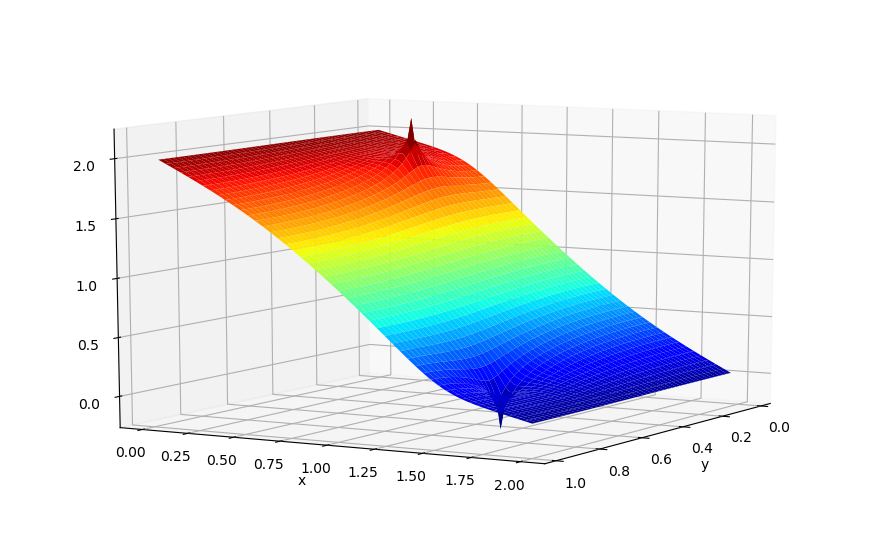

In [24]:
# load libraries
import numpy as np
import time as tm

import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D


# spatial discretization in 2D
nx = 101 - 2    # number of rows
Xg = np.linspace(0 + 0.02, 2 - 0.02 , nx)
dx = Xg[2]-Xg[1]

ny = 51 - 2    # number of columns
Yg = np.linspace(0 + 0.02, 1 - 0.02, ny)
dy = Yg[2]-Yg[1]

print('dx = ', dx, '; dy = ', dy)

# create meshgrid (x and y coordinate of grid points in the 2D grid system) 
xmsh, ymsh = np.meshgrid(Yg, Xg)


# source term
rho = np.zeros((nx,ny))
rho[25,13] = 2000.
rho[75,35] = -2000.


# create a table to record the row and column indices of each grid point
GP_RwCln = np.zeros((ny*nx,3))

# create force vector
f = np.zeros(ny*nx)

cnt = 0
for row in range(nx):
    for column in range(ny):
        
        GP_RwCln[cnt,0] = cnt
        GP_RwCln[cnt,1] = row
        GP_RwCln[cnt,2] = column
        
        # mapping rho from 2D array to a vector, and use it as the force vector
        f[cnt] = -rho[row,column]*(dx**2)    # <== fill the blank
        
        cnt = cnt + 1
# GP_RwCln is a table, in which the 1st column is the label of grid point,
# the 2nd and 3rd columns are the indices of row and column of grid points in the discretization.

    
# create operator matrix and force vector    
Am = np.zeros((ny*nx,ny*nx)) 

# fill the entries in the matrix and force vector
for i in range(ny*nx):
    
    # entries on the main diagonal
    Am[i,i] = -4.0
    

    # cofficient for the neighboring point on the left     
    if GP_RwCln[i,2] > 0 :
        Am[i,i-1] = 1.0
    
    # cofficient for the neighboring point on the right 
    if GP_RwCln[i,2] < ny-1 :
        Am[i,i+1] = 1.0
       
    # For points at the left most column, the coefficients are modified due to the no-flux boundary condition.
    if GP_RwCln[i,2] == 0 :    # <== fill the blank
        Am[i,i] = Am[i,i] + 1.0
        
    # For points at the right most column, the coefficients are modified due to the no-flux boundary condition.
    if GP_RwCln[i,2] == ny-1:    # <== fill the blank
        Am[i,i] = Am[i,i] + 1.0  

    # cofficient for the neighboring point in the row before
    if GP_RwCln[i,1] > 0 :
        Am[i,i-(ny)] = 1.0     # <== fill the blank  
    
    # cofficient for the neighboring point in the row after
    if GP_RwCln[i,1] < nx-1 :
        Am[i,i+(ny)] = 1.0     # <== fill the blank   

    # force vector
    # impose boundary value on the first row, the boundary values are moved to the force vector
    if GP_RwCln[i,1] == 0 :    # <== fill the blank
        f[i] = f[i] - 2.0 
    
    # impose boundary value on the last row, the boundary values are moved to the force vector
    if GP_RwCln[i,1] == nx-1 :    # <== fill the blank
        f[i] = f[i] - 0.0 

            
# # print the operator matrix and force vector constructed.    
# print(Am)
# print(f)

# walltime before direct matrix solving
WT_bgn = tm.time()

# solve vector u_vec
u_vec = np.linalg.solve(Am, f)

# walltime after direct matrix solving        
WT_end = tm.time() 

print(WT_end - WT_bgn)

# verify whether the solution is correct 
resdM = np.matmul(Am,u_vec ) - f       # <== fill the blank
nrm = np.linalg.norm(resdM,2)
print(nrm)


# map the vector of u_vec to the 2D grid system according to the indices of row and column
u_2d = np.zeros((nx,ny))
for i in range(ny*nx):
    u_2d[int(GP_RwCln[i,1]),int(GP_RwCln[i,2])] = u_vec[i]



fig = plt.figure(figsize=(11, 7), dpi=100)
ax = fig.gca(projection='3d')
ax.plot_surface(xmsh,ymsh,u_2d, cmap=cm.jet)
ax.set_xlabel('y')
ax.set_ylabel('x')
ax.view_init(10, 30)
plt.show()

<font color=red>**Question: **</font> **How much faster is the direct solver compared to iterative solver?**

**Your answer:** It is about 8 times faster than iterative solver.

**As you have experienced from comparing these two types of PDE solvers, you may find that point-wise relaxation is easier to implement. However, it is in general slower than a direct matrix solver. In real computational science problems, it is common to deal with ten of millions of grid points that are non-uniformly spaced. What type matrix solver you want to use is all up to what you are willing to trade off,  such as speed or effort.  **

### Congratulations, we're done!

** Don't forget to add your names to the top!!**

Log into the course D2L website (d2l.msu.edu) and go to "Assessments > Assignments > In-class Assignment 20180918".